In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def f(x):
    return 3*x**2 - 4*x + 5

In [26]:
f(3)

20

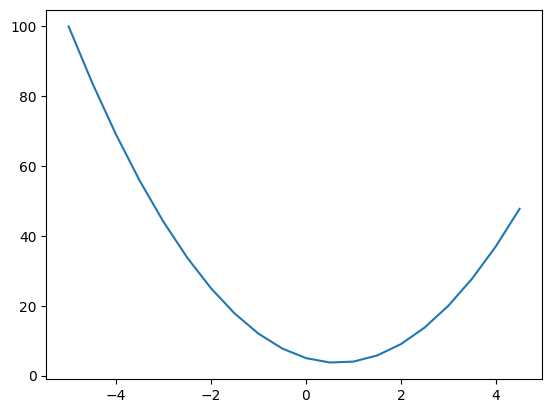

In [27]:
xs = np.arange(-5, 5, 0.5)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

In [95]:
class Value:
    def __init__(self, data, _children=(), _op = " ", label = " "):
        self.data = data 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})" 

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
        
a = Value(2, label='a')
b = Value(-3, label='b')
c = Value(10, label='c')

e = a + b; e.label='e'
d = e + c; d.label = 'd'
f = Value(-2); f.label = 'f'
L = d * f ; L.label = 'L'

In [96]:
d._prev

{Value(data=-1), Value(data=10)}

In [97]:
d._op

'+'

In [98]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes,edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | grad %.4f | data %.4f}" % (n.label, n.grad, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

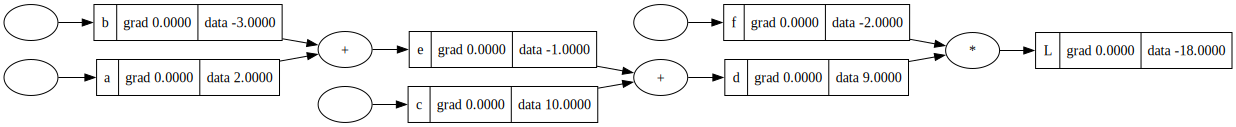

In [99]:
draw_dot(L)

In [100]:
L.grad = 1
d.grad = -2
f.grad = 4
c.grad = -2
e.grad = -2
a.grad = 6
b.grad = -4

In [101]:
a.data += 0.001 * a.grad
b.data += 0.001 * b.grad
c.data += 0.001 * c.grad
f.data += 0.001 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.928064095999999


In [91]:
def lol():
    
    h = 0.001
    a = Value(2, label='a')
    b = Value(-3, label='b')
    c = Value(10, label='c')
    
    e = a * b; e.label='e'
    d = e + c ; d.label = 'd'
    f = Value(-2); f.label = 'f'
    L = d * f ; L.label = 'L'
    L1 = L.data 
    
    a = Value(2 , label='a')
    b = Value(-3 , label='b')
    c = Value(10 , label='c')
    
    e = a * b; e.label='e'
    d = e + c ; d.label = 'd'
    f = Value(-2); f.label = 'f'
    L = d * f ; L.label = 'L'
    L2 = L.data 

    print((L2-L1)/h)

lol()

0.0
